<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font size=8px>
                    <b> Suicide Rates Overview 1985 to 2016
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##  Problem Statement

<b>Compares socio-economic info with suicide rates by year and country</b>

##  Content
<b>This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.</b>

## About this file


1.  Country
2.  Year
3.  Gender
4.  Age Group
5.  Count of suicides
6.  Population
7.  Suicide rate
8.  country-year composite key
9.  HDI(Human Development Index) for year
10. Gdp(Gross Domestic Product) for year
11. Gdp per capita(Person)
12. Generation (based on age grouping average)

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font size=6px>
                    <b> Data Prepration
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Read the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('master.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# we have 27820 rows and 12 columns .

data.shape

(27820, 12)

In [6]:
# we have to change name of column .

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
column_old=['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']

In [8]:
column_new=['Country', 'Year', 'Gender', 'Age', 'Suicides_no', 'Population',
       'Suicides_100k_pop', 'Country-year', 'HDI_for_year',
       'GDP_for_year', 'GDP_per_capita', 'Generation']

In [9]:
# rename column

dict_name=dict(zip(column_old,column_new))
data=data.rename(columns=dict_name)

In [10]:
# Dropped unnessesary column.

data.drop(['Country-year'],axis=1,inplace=True)

In [11]:
data.shape

(27820, 11)

In [12]:
# droped dupelicates value if exist in dataset.

data.drop_duplicates(inplace=True)

In [13]:
# shape is same as before so we can say that we do not have any duplicate values in our dataset.

data.shape

(27820, 11)

In [14]:
# here we can see that HDI for year has maximum null value.
data.isna().sum()

Country                  0
Year                     0
Gender                   0
Age                      0
Suicides_no              0
Population               0
Suicides_100k_pop        0
HDI_for_year         19456
GDP_for_year             0
GDP_per_capita           0
Generation               0
dtype: int64

In [15]:
# now we will drop column HDI_for_year which has more than 50% null value .

data.drop(['HDI_for_year'],axis=1,inplace=True)

In [16]:
data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'Suicides_no', 'Population',
       'Suicides_100k_pop', 'GDP_for_year', 'GDP_per_capita', 'Generation'],
      dtype='object')

In [17]:
# we can see that now no null value exist in our dataset .

data.isna().sum()

Country              0
Year                 0
Gender               0
Age                  0
Suicides_no          0
Population           0
Suicides_100k_pop    0
GDP_for_year         0
GDP_per_capita       0
Generation           0
dtype: int64

In [18]:
# now we will check some unique values from dataset which will help to understand data.

In [19]:
data.Country.nunique()

101

In [20]:
data.Year.unique()
data.Year.nunique()

32

In [21]:
data.Gender.unique()

array(['male', 'female'], dtype=object)

In [22]:
data.Age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [23]:
data.Generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [24]:
# now here we are removing special charecters from our dataset if exist .

sp_ch=['!','"','#','$','%','&',"'",'(',')','*','+',',','‑','.','/',':','<','=','>','?','@']

In [25]:
count=0
for i in data.columns:
    for j in range(0,27820):
        if data[i][j] in sp_ch:
            print(data[i])[j]
        else:
            count +=1
print(count)

278200


In [26]:
# we can see that our data is exact the size of count so that means our data does not have any special charecter .
# now we can go for our further process of visualization.

data.size

278200

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font size=6px>
                    <b> Data Visualization
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### we have prepared our data for visualization .
### we will use plots to see insights of data .
### by using plots we can easily understand relation between data and understand better to large data as well.

In [27]:
import matplotlib.pyplot as plt

In [28]:
data.head()

,Country,Year,Gender,Age,Suicides_no,Population,Suicides_100k_pop,GDP_for_year,GDP_per_capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [29]:
# first of all we will describe data .

data.describe()

,Year,Suicides_no,Population,Suicides_100k_pop,GDP_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [30]:
# we can see some basic details from above description.
# total no of data is 27820
# year starts from 1985 and ends with 2016.
# min suicide numbers is zero and maximum suicide number is 22338.
# we have max population 4.38052e+07 means 43805210 and min population is 2.7800003+02 means 278 .
# than we have suicide count per 100k persons in that we have max suicede is 224.97 and min suicide is 0 
# and also max gdp is 126352 and min gdp is 251.

In [31]:
# now we will see by graphical representation of data .
# first of all we will check relation between data
corr_data=data.corr()

In [32]:
corr_data

,Year,Suicides_no,Population,Suicides_100k_pop,GDP_per_capita
Year,1.000000,-0.004546,0.008850,-0.039037,0.339134
Suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
Population,0.008850,0.616162,1.000000,0.008285,0.081510
Suicides_100k_pop,-0.039037,0.306604,0.008285,1.000000,0.001785
GDP_per_capita,0.339134,0.061330,0.081510,0.001785,1.000000


In [33]:
labels=list(corr_data.columns)

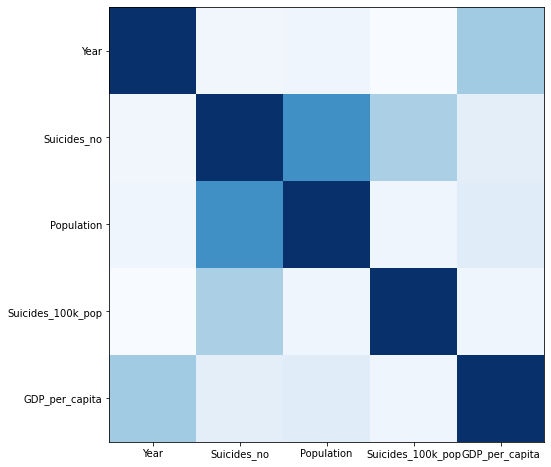

In [34]:
# now we will convert it in graph.
fig, ax = plt.subplots(figsize=(8,8))
x=np.arange(len(corr_data.columns))
y=np.arange(len(corr_data.columns))
labels=list(corr_data.columns)
plt.imshow(corr_data,cmap='Blues')
ax.set_xticks(x,labels)
ax.set_yticks(y,labels)

In [35]:
# in above graph we can see that where color is dark means there is more relationship between data.
# and where color is dark means there is more relationship between data.
# we can see that population is most related with number of suicide .

In [36]:
# now lets see categorical data .

cat_data=data.select_dtypes(include=object)

In [37]:
cat_data

,Country,Gender,Age,GDP_for_year,Generation
0,Albania,male,15-24 years,"2,156,624,900",Generation X
1,Albania,male,35-54 years,"2,156,624,900",Silent
2,Albania,female,15-24 years,"2,156,624,900",Generation X
3,Albania,male,75+ years,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,"2,156,624,900",Boomers
...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,"63,067,077,179",Generation Z


In [38]:
grouped_gender=data.groupby('Gender')[["Suicides_no"]].sum()
grouped_gender

,Suicides_no
Gender,
female,1559510
male,5188910


In [39]:
G=list(data['Gender'].unique())
S=list(grouped_gender['Suicides_no'].unique())

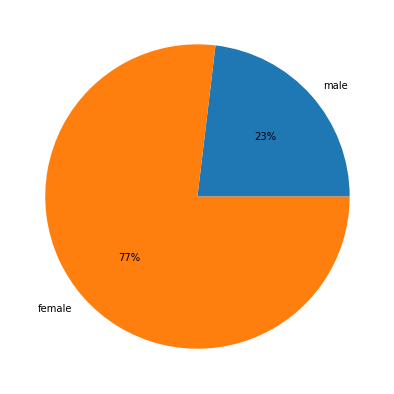

In [40]:
fig = plt.figure(figsize =(10, 7))
plt.pie(S, labels =G,autopct='%1.0f%%')
plt.show()

In [41]:
# we can see in above graph that male have commited more suicides than female .
# here male suicide ratio is more than woomen .

In [42]:
total_suicide=data['Suicides_no'].sum()
total_suicide

6748420

In [43]:
male_suiside_ratio=5188910/total_suicide*100
male_suiside_ratio

76.89073886924643

In [44]:
female_suicide_ratio=1559510/total_suicide*100
female_suicide_ratio

23.10926113075357

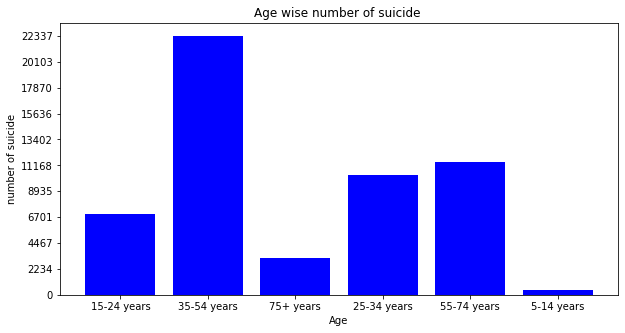

In [45]:
# here we prepared comparision Age wise suicide number .

figure=plt.figure(figsize=(10,5))
x=data['Age']
y=data['Suicides_no']
plt.bar(x,y,color='blue')
plt.xlabel('Age')
plt.ylabel('number of suicide')
plt.yticks(np.arange(data['Suicides_no'].min(),data['Suicides_no'].max(),2233.7))
plt.title('Age wise number of suicide ')
plt.show()

In [46]:
# in above graph we can see that maximun suicide was commited in range of 25 to 54 years people .
# and then 55 to 74 and 35 to 54.
# so we can say that mostly suicide commited in peoples younger age .

In [47]:
# from all three graphs we can asume that mostly suicide is commited by the male and in range of 35 to 54 years age .

In [48]:
data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'Suicides_no', 'Population',
       'Suicides_100k_pop', 'GDP_for_year', 'GDP_per_capita', 'Generation'],
      dtype='object')

In [50]:
cv=data.groupby('Country')

In [54]:
new_countrywise=cv['Suicides_no'].count().to_frame()

In [58]:
new_countrywise.head(10)

,Suicides_no
Country,
Albania,264
Antigua and Barbuda,324
Argentina,372
Armenia,298
Aruba,168
Australia,360
Austria,382
Azerbaijan,192
Bahamas,276


array([<AxesSubplot:ylabel='Suicides_no'>], dtype=object)

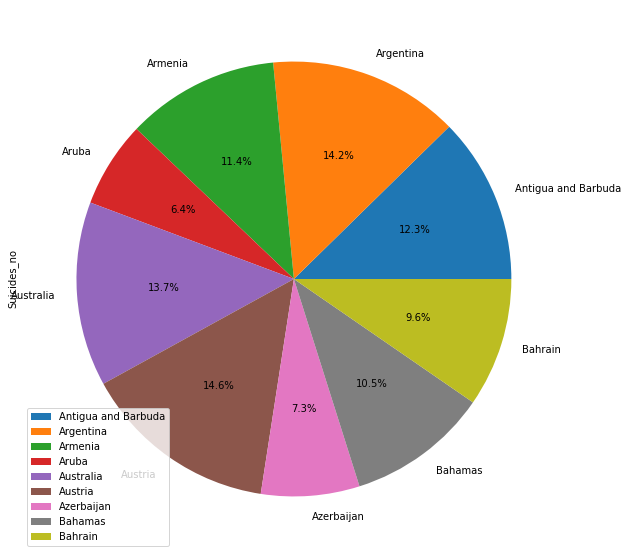

In [57]:
new_countrywise.iloc[1:10].plot(kind='pie',subplots=True,autopct='%0.1f%%',figsize=(15,10))

array([<AxesSubplot:ylabel='Suicides_no'>], dtype=object)

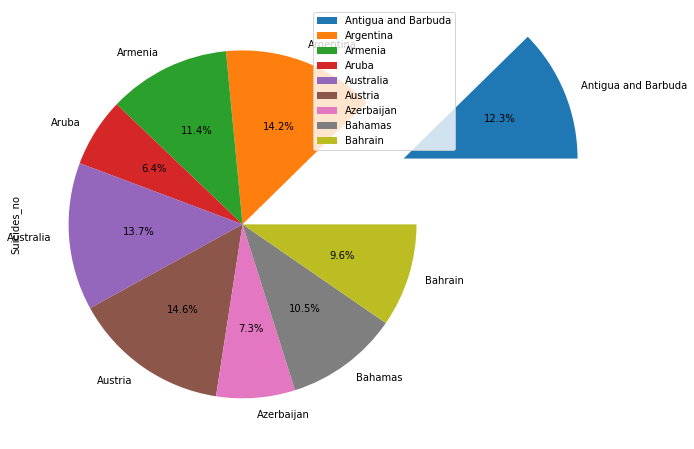

In [68]:
new_countrywise.iloc[1:10].plot(kind='pie',subplots=True,autopct='%0.1f%%',figsize=(12,8),explode=[1,0,0,0,0,0,0,0,0])